<a href="https://colab.research.google.com/github/eerga/CapstoneMLZoomcamp/blob/main/EDA_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food 101 - EDA portion

In this notebook, we are going to explore the dataset, take a look at the pictures (their quailty, rotation, etc.) and also going to cut down the size of the data since there are 101 food categories and 1000 pictures for each kind of food. Since deep learning models require many more resources than traditional machine learning models, I think it might be best to focus on 10 categories and 300 images per category at the maximum.

## Getting the Data

In [1]:
import os
import tensorflow as tf
import shutil
import random
from pathlib import Path
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:

# Create the local directory if it doesn't exist
local_dir = "./food-101"
os.makedirs(local_dir, exist_ok=True)

data_url = "https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"
data_dir = tf.keras.utils.get_file(
    origin=data_url,
    fname="food-101",
    untar=True,
    cache_dir=local_dir  # This will download to ./food-101/
)

print(f"Data downloaded to: {data_dir}")

4996278331/4996278331 ━━━━━━━━━━━━━━━━━━━━ 327s 0us/step
Data downloaded to: ./food-101/datasets/food-101


## Evaluating the data size

In [3]:
# Navigate to the images folder
images_dir = os.path.join(data_dir, "food-101/images")

### Get the number of categories

In [4]:
# List all food categories (folders)
food_categories = os.listdir(images_dir)
print(f"Found {len(food_categories)} food categories")

Found 101 food categories


### Get the total number of images

In [5]:
def count_images(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))]
        total_images += len(image_files)
    return total_images

total = count_images(images_dir)
print(f"Total number of images: {total}")

Total number of images: 101000


### Get the number of images per category

In [6]:
categories_info = []
for category in food_categories:
    category_path = os.path.join(images_dir, category)
    if os.path.isdir(category_path):
        num_images = len(os.listdir(category_path))
        categories_info.append((category, num_images))

# Sort by number of images (descending)
categories_info.sort(key=lambda x: x[1], reverse=True)

print("Food categories ranked by number of images:")
print("-" * 50)
for i, (category, count) in enumerate(categories_info, 1):
    print(f"{i:2d}. {category.replace('_', ' ').title():<25}: {count:>4} images")

Food categories ranked by number of images:
--------------------------------------------------
 1. Breakfast Burrito        : 1000 images
 2. Croque Madame            : 1000 images
 3. Creme Brulee             : 1000 images
 4. French Onion Soup        : 1000 images
 5. Waffles                  : 1000 images
 6. Ice Cream                : 1000 images
 7. Crab Cakes               : 1000 images
 8. Pad Thai                 : 1000 images
 9. Macarons                 : 1000 images
10. Foie Gras                : 1000 images
11. Grilled Cheese Sandwich  : 1000 images
12. Hot Dog                  : 1000 images
13. Peking Duck              : 1000 images
14. Caprese Salad            : 1000 images
15. Spaghetti Carbonara      : 1000 images
16. Filet Mignon             : 1000 images
17. Tuna Tartare             : 1000 images
18. Beef Tartare             : 1000 images
19. Pork Chop                : 1000 images
20. Lasagna                  : 1000 images
21. Escargots                : 1000 images
22

### Selection of the categories

Even though all of the food choices sound great, we are going to be sticking with 8 most popular main dish courses and 2 desserts. The choices for the dishes are:
<br>8 Main Dishes:
- Pizza (#82) - Classic Italian, very distinct appearance
- Sushi (#61) - Japanese, unique presentation style
- Hamburger (#85) - American classic, easily recognizable
- Tacos (#19) - Mexican, distinctive shape and ingredients
- Pad Thai (#64) - Thai noodles, colorful and distinct
- Chicken Curry (#88) - Indian/Asian, rich sauce-based dish
- Fish And Chips (#18) - British classic, unique presentation
- Ramen (#80) - Japanese soup, distinctive bowl presentation
<br>2 Desserts:
- Chocolate Cake (#68) - Classic dessert, very recognizable
- Ice Cream (#2) - Universal dessert, various presentations

<br> I want to cover dishes with visual diversity, representation of different cuisines, and something that is simply popular and delicious.

In [7]:
# Selected categories
selected_categories = [
    'pizza', 'sushi', 'hamburger', 'tacos', 'pad_thai',
    'chicken_curry', 'fish_and_chips', 'ramen',
    'chocolate_cake', 'ice_cream'
]

# Set up paths
source_path = "./food-101/datasets/food-101/food-101/images"
subset_path = "./food-101/subset"

# Create subset directory
os.makedirs(subset_path, exist_ok=True)

# Copy images for each category
for category in selected_categories:
    print(f"Processing {category}...")

    # Create category directory
    category_subset_path = os.path.join(subset_path, category)
    os.makedirs(category_subset_path, exist_ok=True)

    # Get source category path
    category_source_path = os.path.join(source_path, category)

    if os.path.exists(category_source_path):
        # Get all images in this category
        all_images = [f for f in os.listdir(category_source_path)
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Select 300 random images (or all if less than 300)
        selected_images = random.sample(all_images, min(300, len(all_images)))

        # Copy selected images
        for img in selected_images:
            src_file = os.path.join(category_source_path, img)
            dst_file = os.path.join(category_subset_path, img)
            shutil.copy2(src_file, dst_file)

        print(f"✓ Copied {len(selected_images)} images for {category}")
    else:
        print(f"✗ Category {category} not found in source directory")

print(f"\nSubset created at: {subset_path}")

# Verify the result
print("\nSubset summary:")
for category in selected_categories:
    category_path = os.path.join(subset_path, category)
    if os.path.exists(category_path):
        count = len(os.listdir(category_path))
        print(f"{category}: {count} images")

Processing pizza...
✓ Copied 300 images for pizza
Processing sushi...
✓ Copied 300 images for sushi
Processing hamburger...
✓ Copied 300 images for hamburger
Processing tacos...
✓ Copied 300 images for tacos
Processing pad_thai...
✓ Copied 300 images for pad_thai
Processing chicken_curry...
✓ Copied 300 images for chicken_curry
Processing fish_and_chips...
✓ Copied 300 images for fish_and_chips
Processing ramen...
✓ Copied 300 images for ramen
Processing chocolate_cake...
✓ Copied 300 images for chocolate_cake
Processing ice_cream...
✓ Copied 300 images for ice_cream

Subset created at: ./food-101/subset

Subset summary:
pizza: 300 images
sushi: 300 images
hamburger: 300 images
tacos: 300 images
pad_thai: 300 images
chicken_curry: 300 images
fish_and_chips: 300 images
ramen: 300 images
chocolate_cake: 300 images
ice_cream: 300 images


### Inspecting the Images

In [8]:
def show_food_image(category_name, image_index=0):
    """
    Display a food image by category name and image index

    Parameters:
    category_name (str): Name of the food category (e.g., 'pizza', 'sushi')
    image_index (int): Index of the image within that category (0 to available images - 1)
    """

    images_dir_subset = "./food-101/subset"

    # Check if category exists
    category_path = os.path.join(images_dir_subset, category_name)
    if not os.path.exists(category_path):
        available_categories = [d for d in os.listdir(images_dir_subset)
                              if os.path.isdir(os.path.join(images_dir_subset, d))]
        print(f"Error: Category '{category_name}' not found!")
        print(f"Available categories: {available_categories}")
        return None, None

    # Get images in that category
    image_files = [f for f in os.listdir(category_path)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if len(image_files) == 0:
        print(f"No images found in category '{category_name}'")
        return None, None

    if image_index >= len(image_files):
        print(f"Image index {image_index} out of range. Category '{category_name}' has {len(image_files)} images (0-{len(image_files)-1})")
        return None, None

    # Pick the specified image
    selected_image = image_files[image_index]
    image_path = os.path.join(category_path, selected_image)

    # Load and display the image
    img = load_img(image_path)
    width, height = img.size

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(f"Category: {category_name}")
    print(f"Image: {selected_image} (index {image_index} of {len(image_files)} images)")
    print(f"Full path: {image_path}")
    print(f"Image dimensions: {width} x {height}")
    print(f"Mode: {img.mode}")

    return category_name, selected_image

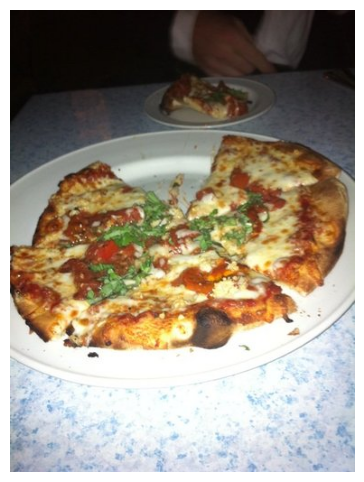

Category: pizza
Image: 326809.jpg (index 120 of 300 images)
Full path: ./food-101/subset/pizza/326809.jpg
Image dimensions: 382 x 512
Mode: RGB


('pizza', '326809.jpg')

In [9]:
# Show a pizza image
show_food_image('pizza', 120)

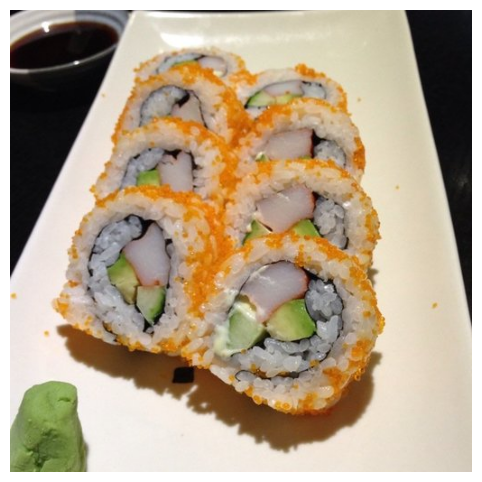

Category: sushi
Image: 1759932.jpg (index 150 of 300 images)
Full path: ./food-101/subset/sushi/1759932.jpg
Image dimensions: 512 x 512
Mode: RGB


('sushi', '1759932.jpg')

In [10]:
show_food_image('sushi', 150)

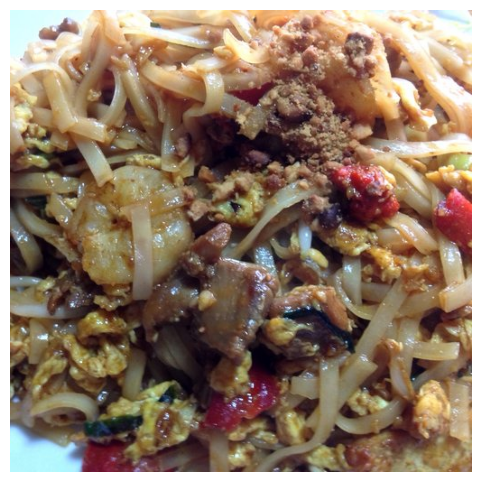

Category: pad_thai
Image: 3613415.jpg (index 180 of 300 images)
Full path: ./food-101/subset/pad_thai/3613415.jpg
Image dimensions: 512 x 512
Mode: RGB


('pad_thai', '3613415.jpg')

In [11]:
show_food_image('pad_thai', 180)

OK, not bad. We have a balanced dataset. Some picture quality could be improved, but again, we are just doing a project. Next step is to split the images into train, test, and validation and then redirect them to the appropriate subdirectories. I also want to resize the images to 299,299,3 size to make my life easier. This will be the end of this notebook. After this, I'd like to keep the images somewhere to be accessed easily.

### Creating final directories

In [12]:
import os
import shutil
import random
from pathlib import Path

def create_food_101_small(source_dir, output_dir, train_split=0.8, val_split=0.1, test_split=0.1):
    """
    Create train/validation/test split from food subset

    Parameters:
    source_dir (str): Path to your food-101-subset directory
    output_dir (str): Path for the new food_101_small directory
    train_split (float): Proportion for training (default 0.8)
    val_split (float): Proportion for validation (default 0.1)
    test_split (float): Proportion for testing (default 0.1)
    """

    # Verify splits add up to 1.0
    assert abs(train_split + val_split + test_split - 1.0) < 1e-6, "Splits must add up to 1.0"

    # Create output directory structure
    output_path = Path(output_dir)
    train_path = output_path / "train"
    val_path = output_path / "validation"
    test_path = output_path / "test"

    # Create directories
    for split_path in [train_path, val_path, test_path]:
        split_path.mkdir(parents=True, exist_ok=True)

    # Get all categories
    source_path = Path(source_dir)
    categories = [d.name for d in source_path.iterdir() if d.is_dir()]

    print(f"Found categories: {categories}")
    print(f"Split ratios: Train {train_split:.1%}, Val {val_split:.1%}, Test {test_split:.1%}")
    print("-" * 60)

    # Process each category
    for category in categories:
        print(f"Processing {category}...")

        # Create category directories in each split
        for split_path in [train_path, val_path, test_path]:
            (split_path / category).mkdir(exist_ok=True)

        # Get all images in this category
        category_source = source_path / category
        image_files = [f for f in category_source.iterdir()
                      if f.suffix.lower() in ['.jpg', '.jpeg', '.png']]

        # Shuffle images randomly
        random.shuffle(image_files)

        # Calculate split indices
        total_images = len(image_files)
        train_end = int(total_images * train_split)
        val_end = train_end + int(total_images * val_split)

        # Split the images
        train_images = image_files[:train_end]
        val_images = image_files[train_end:val_end]
        test_images = image_files[val_end:]

        # Copy images to respective directories
        for images, split_name, split_path in [
            (train_images, "train", train_path),
            (val_images, "validation", val_path),
            (test_images, "test", test_path)
        ]:
            target_dir = split_path / category
            for img_file in images:
                shutil.copy2(img_file, target_dir / img_file.name)

        print(f"  ✓ {category}: {len(train_images)} train, {len(val_images)} val, {len(test_images)} test")

    print("-" * 60)
    print(f"Dataset created at: {output_dir}")

    # Summary
    print("\nDataset Summary:")
    for split_name, split_path in [("Train", train_path), ("Validation", val_path), ("Test", test_path)]:
        total_images = sum(len(list((split_path / cat).iterdir())) for cat in categories)
        print(f"{split_name:10}: {total_images:4d} images across {len(categories)} categories")

In [13]:
source_directory = "./food-101/subset"  # Current subset directory
output_directory = "./food_101_small"   # New split directory

# Set random seed for reproducibility
random.seed(42)

# Create the split dataset
create_food_101_small(source_directory, output_directory)

# Verify the structure
print("\nDirectory structure:")
for root, dirs, files in os.walk("./food_101_small"):
    level = root.replace("./food_101_small", '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    if level == 2:  # Only show count for category directories
        print(f"{indent}  ({len(files)} images)")

Found categories: ['ice_cream', 'pad_thai', 'fish_and_chips', 'chicken_curry', 'sushi', 'pizza', 'chocolate_cake', 'hamburger', 'ramen', 'tacos']
Split ratios: Train 80.0%, Val 10.0%, Test 10.0%
------------------------------------------------------------
Processing ice_cream...
  ✓ ice_cream: 240 train, 30 val, 30 test
Processing pad_thai...
  ✓ pad_thai: 240 train, 30 val, 30 test
Processing fish_and_chips...
  ✓ fish_and_chips: 240 train, 30 val, 30 test
Processing chicken_curry...
  ✓ chicken_curry: 240 train, 30 val, 30 test
Processing sushi...
  ✓ sushi: 240 train, 30 val, 30 test
Processing pizza...
  ✓ pizza: 240 train, 30 val, 30 test
Processing chocolate_cake...
  ✓ chocolate_cake: 240 train, 30 val, 30 test
Processing hamburger...
  ✓ hamburger: 240 train, 30 val, 30 test
Processing ramen...
  ✓ ramen: 240 train, 30 val, 30 test
Processing tacos...
  ✓ tacos: 240 train, 30 val, 30 test
------------------------------------------------------------
Dataset created at: ./food_10

### Zipping the data to be uploaded to Kaggle

In [14]:
import shutil

# Create a zip file of your dataset
shutil.make_archive('food_101_small', 'zip', './food_101_small')
print("Dataset zipped as food_101_small.zip")

Dataset zipped as food_101_small.zip


In [15]:
from google.colab import files

# Download the zip file to your local computer
files.download('food_101_small.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>